# Project 1 - Population Prediction
### CS 5/7394 - Dr. Mark Fontenot
### Amory Weinzierl, Randolph Rankin, Sofia Murillo, Jennifer Carballo

In [150]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# ignores warnings
import warnings
warnings.filterwarnings('ignore')

## data preparation

In [151]:
# reads in csv file

df = pd.read_csv("aggregate_hdi_indicators_with_population.csv")

In [152]:
# display dataframe created from csv file

df

,Entity,Code,Year,Population (historical estimates),"Fertility rate (Complete Gapminder, v12) (2017)","Mortality rate, infant (per 1,000 live births)",Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)",Actual Human Development Index (UNDP)
0,Afghanistan,AFG,1800,3280000.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1801,3280000.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1802,3280000.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1803,3280000.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1804,3280000.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49729,Zimbabwe,ZWE,2017,14236599.0,3.68,4.05,60.812,8.2,10.3,3207.887558,0.535
49730,Zimbabwe,ZWE,2018,14438812.0,NaN,3.93,61.195,NaN,NaN,3262.224759,NaN
49731,Zimbabwe,ZWE,2019,14645473.0,NaN,3.84,61.490,NaN,NaN,NaN,NaN
49732,Zimbabwe,ZWE,2020,14862927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# calculate HDI rate per year 

#life expectancy index
#<-- ([Life expectancy] - [Life Expectancy Minimum]) / ([Life Expectancy Goalpost] - [Life Expectancy Minimum])
# ([life expentance of country] - 20) / (85 - 20))

#education expectancy index
#((([Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))] 
# - [Mean Years of Schooling Minimum]) / ([Mean Years of Schooling Goalpost] - [Mean Years of Schooling Minimum])) + (([Expected Years of Schooling (years)] - [Expected Years of Schooling Minimum]) 
# / ([Expected Years of Schooling Goalpost] - [Expected Years of Schooling Minimum]))) / 2

#income expectancy index
# (LN([GNI per capita, PPP (constant 2017 international $)]) - LN([GNI per Capita Minimum])) 
# / (LN([GNI per Capita Goalpost]) - LN([GNI per Capita Minimum]))

#HDI
# ([Calculated Life Expectancy Index] * [Calculated Education Index] * [Calculated GNI per Capita Index]) ^ (1/3)


# find life expectancy weight for each country (life expectancy/global life expetancy)
# apply weight to life expectany (weight (^) * life expectancy)
# create new column to store
# use all countries weighted life expectancies to get global life expectancy
# do with other factors
# find gobal HDI

In [154]:
# drop unnecessary columns & rename dataframe

factors = df.drop(columns = ['Fertility rate (Complete Gapminder, v12) (2017)', 'Mortality rate, infant (per 1,000 live births)', 'Code'])

In [155]:
factors

,Entity,Year,Population (historical estimates),Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)",Actual Human Development Index (UNDP)
0,Afghanistan,1800,3280000.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1801,3280000.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1802,3280000.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1803,3280000.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1804,3280000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
49729,Zimbabwe,2017,14236599.0,60.812,8.2,10.3,3207.887558,0.535
49730,Zimbabwe,2018,14438812.0,61.195,NaN,NaN,3262.224759,NaN
49731,Zimbabwe,2019,14645473.0,61.490,NaN,NaN,NaN,NaN
49732,Zimbabwe,2020,14862927.0,NaN,NaN,NaN,NaN,NaN


In [156]:
# drop all rows that have less than 4 non-na values

factors = factors.dropna(thresh=4)

In [157]:
factors

,Entity,Year,Population (historical estimates),Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)",Actual Human Development Index (UNDP)
70,Afghanistan,1870,4142928.0,NaN,0.01,NaN,NaN,NaN
75,Afghanistan,1875,4247357.0,NaN,0.01,NaN,NaN,NaN
80,Afghanistan,1880,4354370.0,NaN,0.01,NaN,NaN,NaN
85,Afghanistan,1885,4464010.0,NaN,0.01,NaN,NaN,NaN
90,Afghanistan,1890,4576341.0,NaN,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
49727,Zimbabwe,2015,13814642.0,59.534,8.20,10.3,2858.616749,0.529
49728,Zimbabwe,2016,14030338.0,60.294,8.20,10.3,2884.156050,0.532
49729,Zimbabwe,2017,14236599.0,60.812,8.20,10.3,3207.887558,0.535
49730,Zimbabwe,2018,14438812.0,61.195,NaN,NaN,3262.224759,NaN


## Data Calculation

In [158]:
# create new rows to hold weights

factors["Life Expectancy Weight"] = np.nan
factors["Weighted Life Expectancy"] = np.nan
factors["YOS Weight"] = np.nan
factors["Weighted YOS"] = np.nan
factors["Expected YOS Weight"] = np.nan
factors["Weighted Expected YOS"] = np.nan
factors["GNI Weight"] = np.nan
factors["Weighted GNI"] = np.nan

In [159]:
factors

,Entity,Year,Population (historical estimates),Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)",Actual Human Development Index (UNDP),Life Expectancy Weight,Weighted Life Expectancy,YOS Weight,Weighted YOS,Expected YOS Weight,Weighted Expected YOS,GNI Weight,Weighted GNI
70,Afghanistan,1870,4142928.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Afghanistan,1875,4247357.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,Afghanistan,1880,4354370.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Afghanistan,1885,4464010.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Afghanistan,1890,4576341.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,Zimbabwe,2015,13814642.0,59.534,8.20,10.3,2858.616749,0.529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49728,Zimbabwe,2016,14030338.0,60.294,8.20,10.3,2884.156050,0.532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49729,Zimbabwe,2017,14236599.0,60.812,8.20,10.3,3207.887558,0.535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49730,Zimbabwe,2018,14438812.0,61.195,NaN,NaN,3262.224759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
# reorder rows

factors = factors[["Entity",
                   "Year", 
                   "Population (historical estimates)", 
                   "Life expectancy", "Life Expectancy Weight", "Weighted Life Expectancy", 
                   "Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))", "YOS Weight", "Weighted YOS",
                   "Expected Years of Schooling (years)", "Expected YOS Weight", "Weighted Expected YOS",
                   "GNI per capita, PPP (constant 2017 international $)", "GNI Weight", "Weighted GNI",
                   "Actual Human Development Index (UNDP)"
                  ]]

In [161]:
factors

,Entity,Year,Population (historical estimates),Life expectancy,Life Expectancy Weight,Weighted Life Expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",YOS Weight,Weighted YOS,Expected Years of Schooling (years),Expected YOS Weight,Weighted Expected YOS,"GNI per capita, PPP (constant 2017 international $)",GNI Weight,Weighted GNI,Actual Human Development Index (UNDP)
70,Afghanistan,1870,4142928.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Afghanistan,1875,4247357.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,Afghanistan,1880,4354370.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Afghanistan,1885,4464010.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Afghanistan,1890,4576341.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,Zimbabwe,2015,13814642.0,59.534,NaN,NaN,8.20,NaN,NaN,10.3,NaN,NaN,2858.616749,NaN,NaN,0.529
49728,Zimbabwe,2016,14030338.0,60.294,NaN,NaN,8.20,NaN,NaN,10.3,NaN,NaN,2884.156050,NaN,NaN,0.532
49729,Zimbabwe,2017,14236599.0,60.812,NaN,NaN,8.20,NaN,NaN,10.3,NaN,NaN,3207.887558,NaN,NaN,0.535
49730,Zimbabwe,2018,14438812.0,61.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3262.224759,NaN,NaN,NaN


In [162]:
# test out to find sum of population for only rows where year = 1870

print(factors['Population (historical estimates)'].loc[factors['Year'] == 1870].mean())

10992194.0990991


In [163]:
# test out to find sum of population for only rows where year = 1870 and the life expectancy column is not 

print(factors['Population (historical estimates)'].loc[(factors['Year'] == 1870) 
                                                       & (pd.notna(factors['Life expectancy']))].sum())

125189418.0


In [164]:
# test out weight equation on the above requirements

factors['Life Expectancy Weight'].loc[(factors['Year'] == 1870) & (pd.notna(factors['Life expectancy']))] = (
    factors['Population (historical estimates)'].loc[(factors['Year'] == 1870) & (pd.notna(factors['Life expectancy']))] 
    / factors['Population (historical estimates)'].loc[(factors['Year'] == 1870) 
                                                       & (pd.notna(factors['Life expectancy']))].sum())

In [165]:
# take a look at dataframe to see how its been populated based on equation above

factors.loc[(factors['Year'] == 1870) & (pd.notna(factors['Life expectancy']))]

,Entity,Year,Population (historical estimates),Life expectancy,Life Expectancy Weight,Weighted Life Expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",YOS Weight,Weighted YOS,Expected Years of Schooling (years),Expected YOS Weight,Weighted Expected YOS,"GNI per capita, PPP (constant 2017 international $)",GNI Weight,Weighted GNI,Actual Human Development Index (UNDP)
2464,Austria,1870,4528451.0,34.400002,0.036173,NaN,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4018,Belgium,1870,5097637.0,40.900002,0.040719,NaN,2.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11333,Denmark,1870,1887969.0,45.970001,0.015081,NaN,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14644,France,1870,38184704.0,36.389999,0.305015,NaN,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19378,Iceland,1870,69836.0,38.340000,0.000558,NaN,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21448,Japan,1870,34388672.0,36.592640,0.274693,NaN,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30430,Netherlands,1870,3609009.0,37.320000,0.028828,NaN,2.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32568,Norway,1870,1736968.0,50.849998,0.013875,NaN,3.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42380,Sweden,1870,4168145.0,44.970001,0.033295,NaN,3.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46846,United Kingdom,1870,31518027.0,40.605000,0.251763,NaN,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
factors.loc[factors['Year'] == 1870]

,Entity,Year,Population (historical estimates),Life expectancy,Life Expectancy Weight,Weighted Life Expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",YOS Weight,Weighted YOS,Expected Years of Schooling (years),Expected YOS Weight,Weighted Expected YOS,"GNI per capita, PPP (constant 2017 international $)",GNI Weight,Weighted GNI,Actual Human Development Index (UNDP)
70,Afghanistan,1870,4142928.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,Albania,1870,606465.0,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,Algeria,1870,3461795.0,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1576,Argentina,1870,1793839.0,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2242,Australia,1870,1759825.0,NaN,NaN,NaN,1.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47512,Uruguay,1870,342659.0,NaN,NaN,NaN,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48400,Venezuela,1870,1700687.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49138,Yemen,1870,2813705.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49360,Zambia,1870,1597641.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# go through all rows of dataframe and find weights for all factors based on year and that factor column is not nan

for year in range(1800, 2020):
    factors['Life Expectancy Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Life expectancy']))] = (
        factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                         & (pd.notna(factors['Life expectancy']))] 
        / factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                           & (pd.notna(factors['Life expectancy']))].sum())
    
    
    factors['YOS Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))] = (
        factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                         & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))] 
        / factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                           & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))].sum())
    
    factors['Expected YOS Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Expected Years of Schooling (years)']))] = (
        factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                         & (pd.notna(factors['Expected Years of Schooling (years)']))] 
        / factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                           & (pd.notna(factors['Expected Years of Schooling (years)']))].sum())
    
    factors['GNI Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))] = (
        factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                         & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))] 
        / factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                           & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))].sum())

In [168]:
# take a look at dataframe
factors.loc[(factors['Year'] == 1900) & (pd.notna(factors['Life expectancy']))]

,Entity,Year,Population (historical estimates),Life expectancy,Life Expectancy Weight,Weighted Life Expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",YOS Weight,Weighted YOS,Expected Years of Schooling (years),Expected YOS Weight,Weighted Expected YOS,"GNI per capita, PPP (constant 2017 international $)",GNI Weight,Weighted GNI,Actual Human Development Index (UNDP)
1606,Argentina,1900,4689224.0,39.000000,0.012348,NaN,0.78,0.003135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3826,Belarus,1900,4909551.0,36.200001,0.012928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4048,Belgium,1900,6717693.0,46.520000,0.017690,NaN,2.58,0.004491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5008,Bolivia,1900,1809836.0,26.000000,0.004766,NaN,0.17,0.001210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5746,Brazil,1900,18063384.0,29.000000,0.047566,NaN,0.47,0.012077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6262,Bulgaria,1900,3994654.0,40.200001,0.010519,NaN,1.33,0.002671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8554,Chile,1900,3135464.0,29.000000,0.008257,NaN,1.30,0.002096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8998,Colombia,1900,4089052.0,29.000000,0.010768,NaN,0.74,0.002734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9736,Costa Rica,1900,316531.0,32.000000,0.000834,NaN,1.21,0.000212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10402,Cuba,1900,1718198.0,32.000000,0.004524,NaN,0.38,0.001149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
# go through dataframe
# make each factors weighted by multiplying weight by original factors

for year in range(1800, 2020):
    factors['Weighted Life Expectancy'].loc[(factors['Year'] == year) & (pd.notna(factors['Life expectancy']))] = (
        factors['Life expectancy'].loc[(factors['Year'] == year) & (pd.notna(factors['Life expectancy']))]
        * factors['Life Expectancy Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Life expectancy']))])
    
    
    factors['Weighted YOS'].loc[(factors['Year'] == year) & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))] = (
        factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))'].loc[(factors['Year'] == year) & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))] 
        * factors['YOS Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))])
    
    
    factors['Weighted Expected YOS'].loc[(factors['Year'] == year) & (pd.notna(factors['Expected Years of Schooling (years)']))] = (
        factors['Expected Years of Schooling (years)'].loc[(factors['Year'] == year) & (pd.notna(factors['Expected Years of Schooling (years)']))] 
        * factors['Expected YOS Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Expected Years of Schooling (years)']))])
    
    factors['Weighted GNI'].loc[(factors['Year'] == year) & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))] = (
        factors['GNI per capita, PPP (constant 2017 international $)'].loc[(factors['Year'] == year) & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))] 
        * factors['GNI Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))])

In [170]:
factors

,Entity,Year,Population (historical estimates),Life expectancy,Life Expectancy Weight,Weighted Life Expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",YOS Weight,Weighted YOS,Expected Years of Schooling (years),Expected YOS Weight,Weighted Expected YOS,"GNI per capita, PPP (constant 2017 international $)",GNI Weight,Weighted GNI,Actual Human Development Index (UNDP)
70,Afghanistan,1870,4142928.0,NaN,NaN,NaN,0.01,0.003395,0.000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Afghanistan,1875,4247357.0,NaN,NaN,NaN,0.01,0.003391,0.000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,Afghanistan,1880,4354370.0,NaN,NaN,NaN,0.01,0.003374,0.000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Afghanistan,1885,4464010.0,NaN,NaN,NaN,0.01,0.003333,0.000033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Afghanistan,1890,4576341.0,NaN,NaN,NaN,0.01,0.003286,0.000033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,Zimbabwe,2015,13814642.0,59.534,0.001872,0.111445,8.20,0.001890,0.015500,10.3,0.001884,0.019403,2858.616749,0.001986,5.677508,0.529
49728,Zimbabwe,2016,14030338.0,60.294,0.001880,0.113337,8.20,0.001898,0.015563,10.3,0.001892,0.019483,2884.156050,0.001994,5.751916,0.532
49729,Zimbabwe,2017,14236599.0,60.812,0.001886,0.114702,8.20,0.001904,0.015616,10.3,0.001898,0.019549,3207.887558,0.001925,6.176262,0.535
49730,Zimbabwe,2018,14438812.0,61.195,0.001892,0.115787,NaN,NaN,NaN,NaN,NaN,NaN,3262.224759,0.002010,6.557683,NaN


In [171]:
# create new dataframe to contain world values
# take mean of weighted averages for every country by year and store in dataset

column_names = ['Year', 'Population', 'Life Expectancy', 'YOS', 'Expected YOS', 'GNI']
world_values = pd.DataFrame(columns = column_names)

for year in range(1800, 2020):
    population = factors['Population (historical estimates)'].loc[factors['Year'] == year].sum()
    life_expectancy = factors['Weighted Life Expectancy'].loc[factors['Year'] == year].sum()
    yos = factors['Weighted YOS'].loc[factors['Year'] == year].sum()
    expected_yos = factors['Weighted Expected YOS'].loc[factors['Year'] == year].sum()
    gni = factors['Weighted GNI'].loc[factors['Year'] == year].sum()
    # print( "Year: ", year, " Life exp: ", life_expectancy, " YOS: ", yos, " Expected YOS: ", expected_yos, " Weighted GNI: ", weighted_GNI)
    
    world_values = world_values.append({'Year' : year, 'Population' : population, 'Life Expectancy' : life_expectancy, 'YOS': yos, 
                                       'Expected YOS' : expected_yos, 'GNI': gni}, 
                ignore_index = True)

In [172]:
world_values

,Year,Population,Life Expectancy,YOS,Expected YOS,GNI
0,1800.0,2.500000e+06,32.130001,0.000000,0.000000,0.000000
1,1801.0,2.489400e+06,36.849998,0.000000,0.000000,0.000000
2,1802.0,2.478845e+06,40.130001,0.000000,0.000000,0.000000
3,1803.0,1.357067e+07,40.050921,0.000000,0.000000,0.000000
4,1804.0,2.457869e+06,39.650002,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
215,2015.0,7.379787e+09,71.999304,7.906675,13.108429,15471.989544
216,2016.0,7.464012e+09,72.223146,7.982917,13.188746,15780.970942
217,2017.0,7.547849e+09,72.426848,7.998527,13.193718,16215.177712
218,2018.0,7.631081e+09,72.612756,0.000000,0.000000,16586.907293


In [173]:
# make year column integers

world_values['Year'] = world_values['Year'].astype(int)
world_values.replace(0.000000, np.nan, inplace = True)

In [174]:
world_values

,Year,Population,Life Expectancy,YOS,Expected YOS,GNI
0,1800,2.500000e+06,32.130001,NaN,NaN,NaN
1,1801,2.489400e+06,36.849998,NaN,NaN,NaN
2,1802,2.478845e+06,40.130001,NaN,NaN,NaN
3,1803,1.357067e+07,40.050921,NaN,NaN,NaN
4,1804,2.457869e+06,39.650002,NaN,NaN,NaN
...,...,...,...,...,...,...
215,2015,7.379787e+09,71.999304,7.906675,13.108429,15471.989544
216,2016,7.464012e+09,72.223146,7.982917,13.188746,15780.970942
217,2017,7.547849e+09,72.426848,7.998527,13.193718,16215.177712
218,2018,7.631081e+09,72.612756,NaN,NaN,16586.907293


In [175]:
world_values = world_values.dropna()

In [176]:
world_values

,Year,Population,Life Expectancy,YOS,Expected YOS,GNI
190,1990,5.327226e+09,65.459139,5.464198,9.618479,13036.525162
191,1991,5.414284e+09,65.638388,5.465263,9.663838,12931.612690
192,1992,5.498914e+09,65.816729,5.598505,9.758527,12848.391243
193,1993,5.581592e+09,66.000292,5.720805,9.826136,12741.379541
194,1994,5.663144e+09,66.191698,5.858699,9.909724,12396.355089
195,1995,5.744207e+09,66.393972,5.995026,10.035383,9983.662735
196,1996,5.824885e+09,66.607294,6.127245,10.129123,10205.383220
197,1997,5.905039e+09,66.831118,6.273268,10.192042,10581.034473
198,1998,5.984787e+09,67.063629,6.404265,10.310817,10743.334413
199,1999,6.064232e+09,67.305912,6.523771,10.432506,10980.900990


In [177]:
# create HDI dataframe to contain all calculated indexes and HDI for each year

# need to reevalute how math is done in collecting factors to get indexes

HDI = column_names = ['Year', 'Population', 'Life Expectancy Index', 'Education Expectancy Index', 'Income Expectancy Index', 'HDI']
HDI = pd.DataFrame(columns = column_names)

for item, rows in world_values.iterrows():
    lei = (world_values['Life Expectancy'].loc[item] - 20)/(85 - 20)
    eei = ((world_values['YOS'].loc[item] / 15) + (world_values['Expected YOS'].loc[item] /18 )) / 2
    iei = (math.log(world_values['GNI'].loc[item]) - math.log(100))/(math.log(75000) - math.log(100))
    hdi = (lei * eei * iei) ** (1/3)
    
    # print( "Year: ", year, " Life exp: ", life_expectancy, " YOS: ", yos, " Expected YOS: ", expected_yos, " Weighted GNI: ", weighted_GNI)
    
    HDI = HDI.append({'Year' : rows['Year'],
                      'Population' : rows['Population'],
                      'Life Expectancy Index' : lei, 
                      'Education Expectancy Index' : eei,
                      'Income Expectancy Index': iei,
                      'HDI' : hdi},
                     ignore_index = True)

In [178]:
HDI

,Year,Population,Life Expectancy Index,Education Expectancy Index,Income Expectancy Index,HDI
0,1990.0,5.327226e+09,0.699371,0.449320,0.735693,0.613743
1,1991.0,5.414284e+09,0.702129,0.450615,0.734472,0.614798
2,1992.0,5.498914e+09,0.704873,0.457687,0.733497,0.618528
3,1993.0,5.581592e+09,0.707697,0.463642,0.732234,0.621670
4,1994.0,5.663144e+09,0.710642,0.470560,0.728087,0.624429
5,1995.0,5.744207e+09,0.713753,0.478595,0.695390,0.619320
6,1996.0,5.824885e+09,0.717035,0.485606,0.698708,0.624271
7,1997.0,5.905039e+09,0.720479,0.492221,0.704169,0.629728
8,1998.0,5.984787e+09,0.724056,0.499887,0.706468,0.634715
9,1999.0,6.064232e+09,0.727783,0.507251,0.709772,0.639904


In [179]:
# make years integers

HDI['Year'] = HDI['Year'].astype(int)

In [180]:
HDI

,Year,Population,Life Expectancy Index,Education Expectancy Index,Income Expectancy Index,HDI
0,1990,5.327226e+09,0.699371,0.449320,0.735693,0.613743
1,1991,5.414284e+09,0.702129,0.450615,0.734472,0.614798
2,1992,5.498914e+09,0.704873,0.457687,0.733497,0.618528
3,1993,5.581592e+09,0.707697,0.463642,0.732234,0.621670
4,1994,5.663144e+09,0.710642,0.470560,0.728087,0.624429
5,1995,5.744207e+09,0.713753,0.478595,0.695390,0.619320
6,1996,5.824885e+09,0.717035,0.485606,0.698708,0.624271
7,1997,5.905039e+09,0.720479,0.492221,0.704169,0.629728
8,1998,5.984787e+09,0.724056,0.499887,0.706468,0.634715
9,1999,6.064232e+09,0.727783,0.507251,0.709772,0.639904


## Data Analysis and Modeling

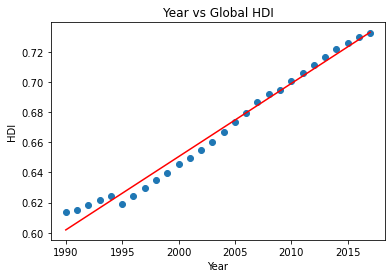

In [181]:
# plot HDI against years

a,b = np.polyfit(HDI['Year'], HDI['HDI'], 1)

plt.scatter(HDI['Year'], HDI['HDI'])
plt.plot(HDI['Year'], a* HDI['Year'] + b, "r")
plt.title('Year vs Global HDI')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.show()

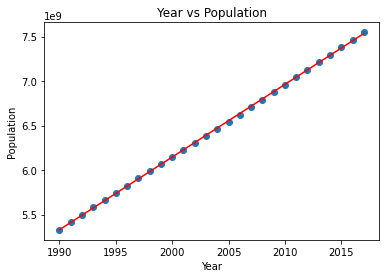

In [182]:
# plot population against years

c,d = np.polyfit(HDI['Year'], HDI['Population'], 1)

plt.scatter(HDI['Year'], HDI['Population'])
plt.plot(HDI['Year'], c * HDI['Year'] + d, "r")
plt.title('Year vs Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [183]:
# line of best fit to confirm 2017
hdi_2017 = a * 2017 + b
print("hdi_from_best_fit_2017 vs hdi_from_calculations_2017")
print(hdi_2017, "      ", HDI['HDI'].loc[27])

# use line of best fit to project hdi of 2122
hdi_2122 = a * 2122 + b
print("\nhdi_2122: ", hdi_2122)

# line of best fit to confirm population of 2017
population_2017 = c * 2017 + d
print("\npopulation_from_best_fit_2017 vs population_from_calculations_2017")
print(population_2017, "             ", HDI['Population'].loc[27])

#use line of best fit to project population of 2122
population_2122 = c * 2122 + d
print("\npopulation_2122: ", population_2122)

hdi_from_best_fit_2017 vs hdi_from_calculations_2017
0.732867803715461        0.7321775184771526

hdi_2122:  1.24213743466575

population_from_best_fit_2017 vs population_from_calculations_2017
7533224561.724182               7547849109.0

population_2122:  16104690501.522888


In [184]:
#create dataframe to compare index calculated values to values calculated by best fit
compare = column_names = ['Year', 'Population', 'Best Fit Calculated Population', 'Index Calculated HDI', 'Best Fit Calculated HDI']
compare = pd.DataFrame(columns = column_names)

for item, rows in HDI.iterrows():
    calc_pop = c * rows['Year'] + d
    calc_HDI = a * rows['Year'] + b
    
    compare = compare.append({'Year' : rows['Year'],
                      'Population' : rows['Population'],
                      'Best Fit Calculated Population' : calc_pop, 
                      'Index Calculated HDI' : rows['HDI'],
                      'Best Fit Calculated HDI': calc_HDI},
                     ignore_index = True)

In [185]:
compare

,Year,Population,Best Fit Calculated Population,Index Calculated HDI,Best Fit Calculated HDI
0,1990.0,5.327226e+09,5.329133e+09,0.613743,0.601913
1,1991.0,5.414284e+09,5.410766e+09,0.614798,0.606763
2,1992.0,5.498914e+09,5.492399e+09,0.618528,0.611613
3,1993.0,5.581592e+09,5.574032e+09,0.621670,0.616463
4,1994.0,5.663144e+09,5.655665e+09,0.624429,0.621314
5,1995.0,5.744207e+09,5.737298e+09,0.619320,0.626164
6,1996.0,5.824885e+09,5.818931e+09,0.624271,0.631014
7,1997.0,5.905039e+09,5.900564e+09,0.629728,0.635864
8,1998.0,5.984787e+09,5.982197e+09,0.634715,0.640714
9,1999.0,6.064232e+09,6.063830e+09,0.639904,0.645564


In [186]:
compare['Year'] = compare['Year'].astype(int)

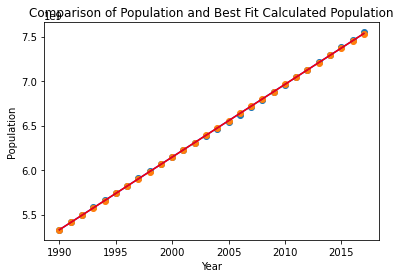

In [187]:
# plot population and calculated population against years
# to see overlap

e,f = np.polyfit(compare['Year'], compare['Population'], 1)
g,h = np.polyfit(compare['Year'], compare['Best Fit Calculated Population'], 1)

plt.scatter(compare['Year'], compare['Population'])
plt.plot(compare['Year'], e * compare['Year'] + f, "b")

plt.scatter(compare['Year'], compare['Best Fit Calculated Population'])
plt.plot(compare['Year'], g * compare['Year'] + h, "r")

plt.title('Comparison of Population and Best Fit Calculated Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

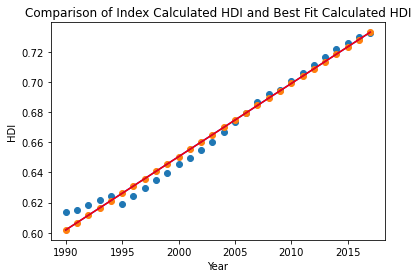

In [188]:
# plot index calculated hdi and best fit calculated hdi against years
# to see overlap

h,i = np.polyfit(compare['Year'], compare['Index Calculated HDI'], 1)
j,k = np.polyfit(compare['Year'], compare['Best Fit Calculated HDI'], 1)

plt.scatter(compare['Year'], compare['Index Calculated HDI'])
plt.plot(compare['Year'], h * compare['Year'] + i, "b")

plt.scatter(compare['Year'], compare['Best Fit Calculated HDI'])
plt.plot(compare['Year'], j * compare['Year'] + k, "r")

plt.title('Comparison of Index Calculated HDI and Best Fit Calculated HDI')
plt.xlabel('Year')
plt.ylabel('HDI')

plt.show()

# index calculated HDI - blue
# best fit calculated HDI - orange

In [189]:
# calculate all pops and HDIs from 2019 - 2122 from best fit and plot
projected = column_names = ['Years', 'Projected Population', 'Projected HDI']
projected = pd.DataFrame(columns = column_names)

# using best fit equatios from above
for year in range(2018, 2123):
    proj_pop = g * year + h
    proj_hdi = j * year + k
    
    projected = projected.append({'Years' : year,
                                  'Projected Population' : proj_pop,
                                  'Projected HDI' : proj_hdi},
                                 ignore_index = True)

In [190]:
projected

,Years,Projected Population,Projected HDI
0,2018.0,1.647354e+11,0.737718
1,2019.0,1.648170e+11,0.742568
2,2020.0,1.648987e+11,0.747418
3,2021.0,1.649803e+11,0.752269
4,2022.0,1.650619e+11,0.757119
...,...,...,...
100,2118.0,1.728987e+11,1.222737
101,2119.0,1.729803e+11,1.227587
102,2120.0,1.730620e+11,1.232437
103,2121.0,1.731436e+11,1.237287


In [191]:
projected['Years'] = projected['Years'].astype(int)

In [192]:
projected

,Years,Projected Population,Projected HDI
0,2018,1.647354e+11,0.737718
1,2019,1.648170e+11,0.742568
2,2020,1.648987e+11,0.747418
3,2021,1.649803e+11,0.752269
4,2022,1.650619e+11,0.757119
...,...,...,...
100,2118,1.728987e+11,1.222737
101,2119,1.729803e+11,1.227587
102,2120,1.730620e+11,1.232437
103,2121,1.731436e+11,1.237287


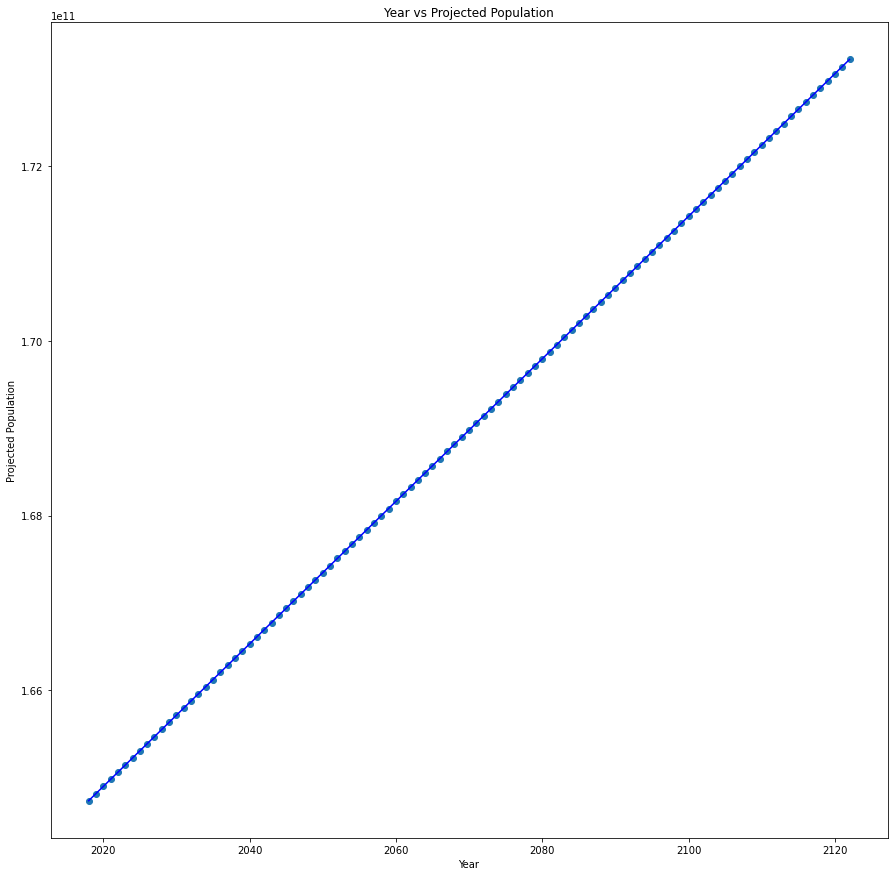

In [193]:
# plot projected population against future years

y,z = np.polyfit(projected['Years'], projected['Projected Population'], 1)

plt.figure(figsize=(15, 15))

plt.title('Year vs Projected Population')
plt.xlabel('Year')
plt.ylabel('Projected Population')

plt.scatter(projected['Years'], projected['Projected Population'])
plt.plot(projected['Years'], y * projected['Years'] + z, "b")


plt.show()

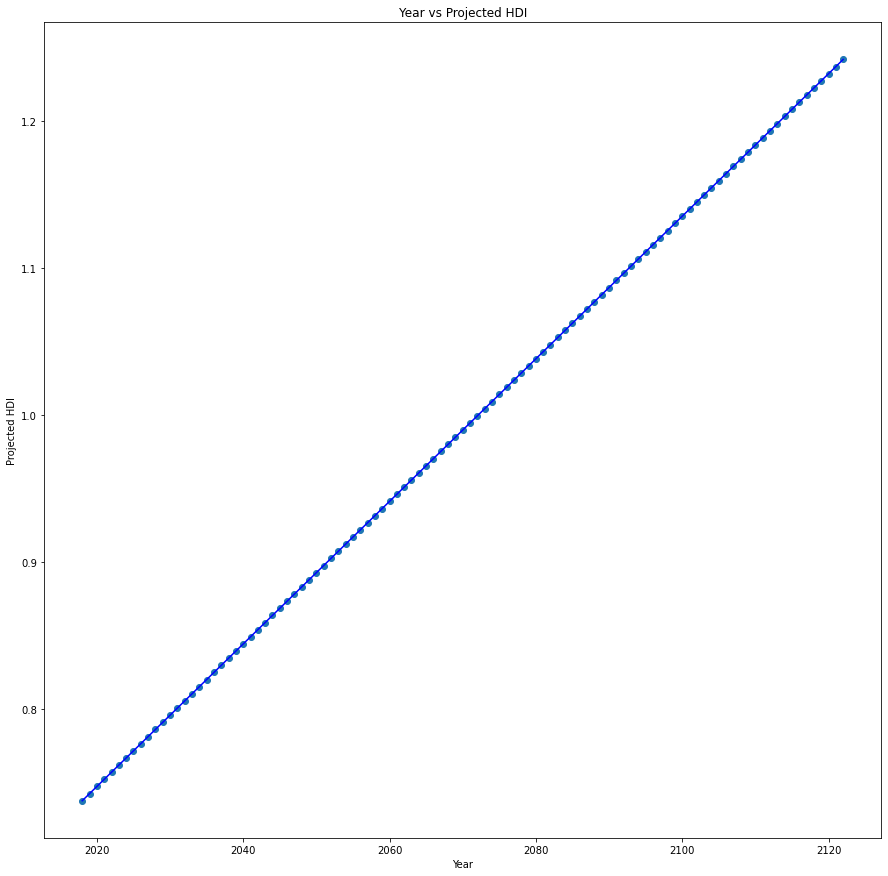

In [194]:
# plot projected HDI against future years

r,s = np.polyfit(projected['Years'], projected['Projected HDI'], 1)

plt.figure(figsize=(15, 15))

plt.title('Year vs Projected HDI')
plt.xlabel('Year')
plt.ylabel('Projected HDI')

plt.scatter(projected['Years'], projected['Projected HDI'])
plt.plot(projected['Years'], r * projected['Years'] + s, "b")

plt.show()

In [195]:
# hdi ended up being more of a validation factor for the population projection